In [132]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [133]:
filepath="data/pima-indians-diabetes.xls"
all_df=pd.read_excel(filepath)

In [134]:
all_df[:2]

,Number of times pregnant,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [135]:
all_df[:2]

,Number of times pregnant,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [136]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df=all_df[msk]
test_df=all_df[~msk]

In [137]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df)) 

total: 768 train: 616 test: 152


In [138]:
all_df.isnull().sum()

Number of times pregnant    0
Unnamed: 1                  0
Unnamed: 2                  0
Unnamed: 3                  0
Unnamed: 4                  0
Unnamed: 5                  0
Unnamed: 6                  0
Unnamed: 7                  0
Unnamed: 8                  0
dtype: int64

In [139]:
def PreprocessData(raw_df):
    
    ndarray= all_df.values
    Features=ndarray[:,1:] 
    Label=ndarray[:,8]
    
    from sklearn import preprocessing
    minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures=minmax_scale.fit_transform(Features)
    
    return scaledFeatures,Label

In [140]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [141]:
train_Features[:4]

array([[0.74371859, 0.59016393, 0.35353535, 0.        , 0.50074516,
        0.23441503, 0.48333333, 1.        ],
       [0.42713568, 0.54098361, 0.29292929, 0.        , 0.39642325,
        0.11656704, 0.16666667, 0.        ],
       [0.91959799, 0.52459016, 0.        , 0.        , 0.34724292,
        0.25362938, 0.18333333, 1.        ],
       [0.44723618, 0.54098361, 0.23232323, 0.11111111, 0.41877794,
        0.03800171, 0.        , 0.        ]])

In [142]:
train_Label[:4]

array([1., 0., 1., 0.])

In [143]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

In [144]:
model=Sequential() 

In [145]:
model.add(Embedding(input_dim=8,output_dim=1))

In [146]:
model.add(LSTM(2))

In [147]:
model.add(Dense(1, activation = "sigmoid"))

In [148]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 1)           8         
_________________________________________________________________
lstm_6 (LSTM)                (None, 2)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [149]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [150]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 614 samples, validate on 154 samples
Epoch 1/30
 - 4s - loss: 0.6893 - acc: 0.6531 - val_loss: 0.6856 - val_acc: 0.6429
Epoch 2/30
 - 0s - loss: 0.6814 - acc: 0.6531 - val_loss: 0.6782 - val_acc: 0.6429
Epoch 3/30
 - 0s - loss: 0.6730 - acc: 0.6531 - val_loss: 0.6696 - val_acc: 0.6429
Epoch 4/30
 - 0s - loss: 0.6633 - acc: 0.6531 - val_loss: 0.6607 - val_acc: 0.6429
Epoch 5/30
 - 0s - loss: 0.6543 - acc: 0.6531 - val_loss: 0.6530 - val_acc: 0.6429
Epoch 6/30
 - 0s - loss: 0.6461 - acc: 0.6531 - val_loss: 0.6472 - val_acc: 0.6429
Epoch 7/30
 - 0s - loss: 0.6396 - acc: 0.6531 - val_loss: 0.6425 - val_acc: 0.6429
Epoch 8/30
 - 0s - loss: 0.6349 - acc: 0.6531 - val_loss: 0.6388 - val_acc: 0.6429
Epoch 9/30
 - 0s - loss: 0.6314 - acc: 0.6531 - val_loss: 0.6355 - val_acc: 0.6429
Epoch 10/30
 - 0s - loss: 0.6276 - acc: 0.6531 - val_loss: 0.6316 - val_acc: 0.6429
Epoch 11/30
 - 0s - loss: 0.6235 - acc: 0.6531 - val_loss: 0.6274 - val_acc: 0.6429
Epoch 12/30
 - 0s - loss: 0.6191 - acc:

In [151]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train],color='blue')
    plt.plot(train_history.history[validation],color='magenta')
    plt.title('Train_history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

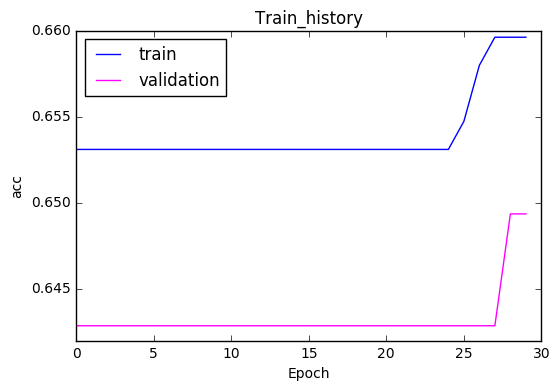

In [152]:
show_train_history(train_history,'acc','val_acc')

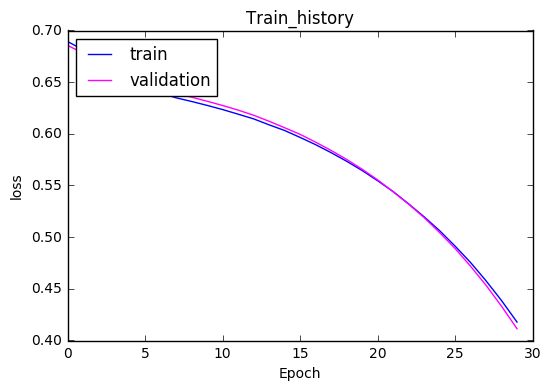

In [153]:
show_train_history(train_history,'loss','val_loss')

In [154]:
scores=model.evaluate(x=test_Features,
                     y=test_Label)

768/768 [==============================] - 0s 103us/step


In [155]:
scores[1]

0.6575520833333334

In [156]:
probility=model.predict(test_Features)

In [157]:
probility[:10]

array([[0.4639524 ],
       [0.19313212],
       [0.4639524 ],
       [0.19313212],
       [0.4639524 ],
       [0.19313212],
       [0.4639524 ],
       [0.19313212],
       [0.4639524 ],
       [0.4639524 ]], dtype=float32)